# Data Visualization Using Seaborn
[Seaborn](http://seaborn.pydata.org/) is a library designed to  make  visualizing statistical relationships easy. It is built on top of matplotlib and pandas, making commonly sought figures that would take many lines using just python manipulation and pyplot take only one.
To quote the Seaborn documentation:
>Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

*NB: Seaborn is really great for exploring your data and making compelling visuals. That being said, it does not allow the same level of customization as working with pyplot, meaning some figures/ types of visuals will be better suited outside of Seaborn*

**Here we will explore some of Seaborn's functions:**


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt # not strictly necessary for most plotting applications

Seaborn has a built in load data function which points to this [repo](https://github.com/mwaskom/seaborn-data) which we  will be pulling from ([Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)).

In [2]:
#  First we will load the Iris flower dataset, this dataset consists of severa, measurements made from 50 flowers 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# we have 4 differnt measurements from each flower.
print('Mesurements:\t', iris.columns.values[:-1])
print('Species:\t', iris.species.unique())
# bonus question, what is a Sepal?

Mesurements:	 ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
Species:	 ['setosa' 'versicolor' 'virginica']


Traditionally, if we were interested in determining which factors might differentiate the different species, we might look at how the species vary along different variables. With a single line, seaborn allows us to view almost every relationship we could be interested in:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


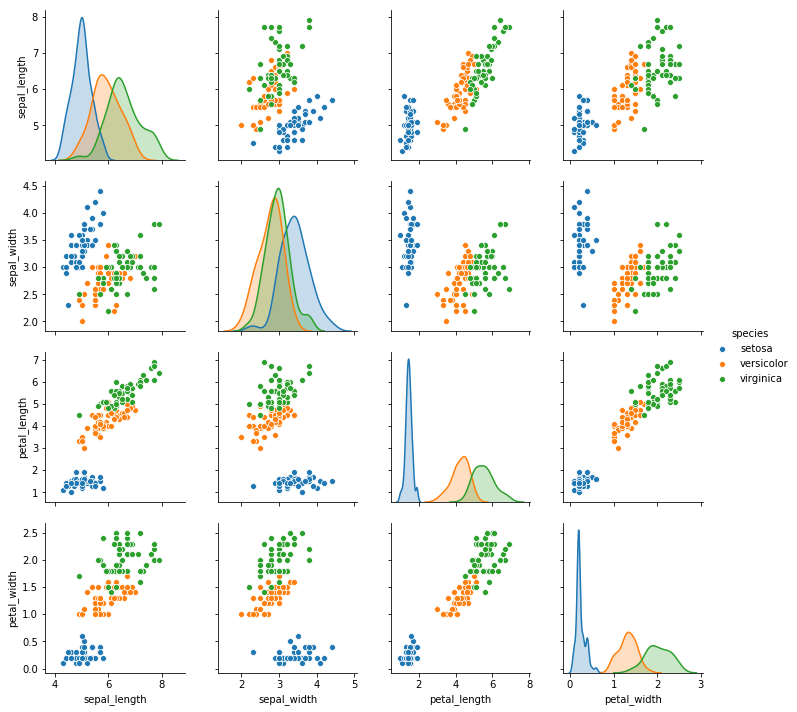

In [4]:
sns.pairplot(data=iris,hue='species')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


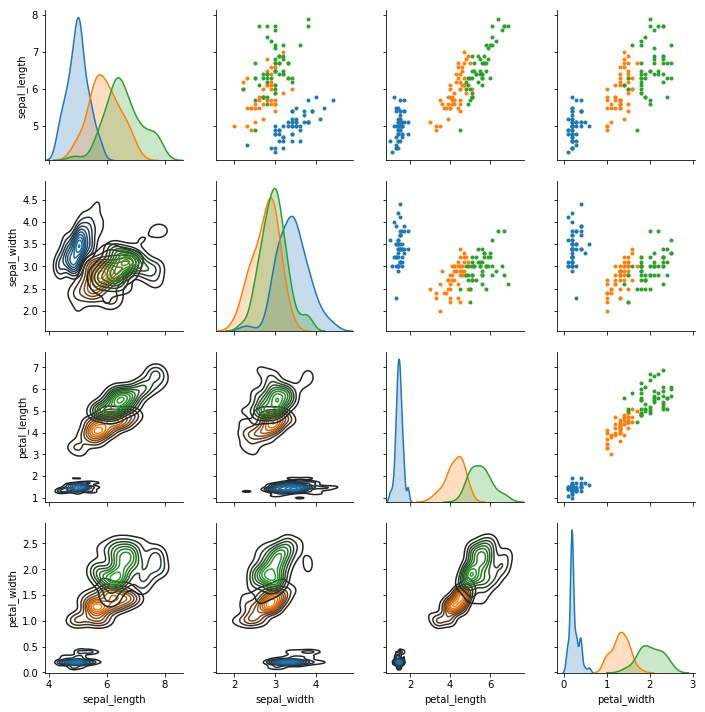

In [5]:
# If we want  to get fancier, we always  can
grid = sns.PairGrid(data= iris,hue='species',diag_sharey=0)

# Map the plots to the locations
# many  other fun things can  go in here, ie. plt.hist(), sns.regplot
grid = grid.map_upper(plt.scatter,marker='.')
grid = grid.map_diag(sns.kdeplot,shade=True)
grid = grid.map_lower(sns.kdeplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


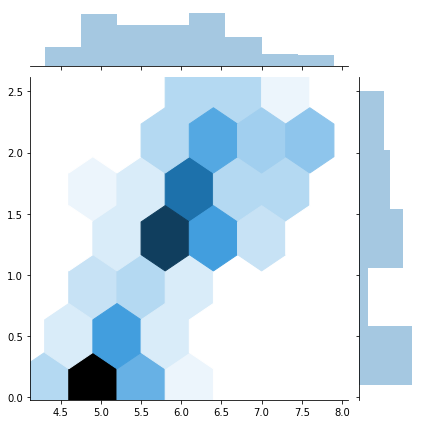

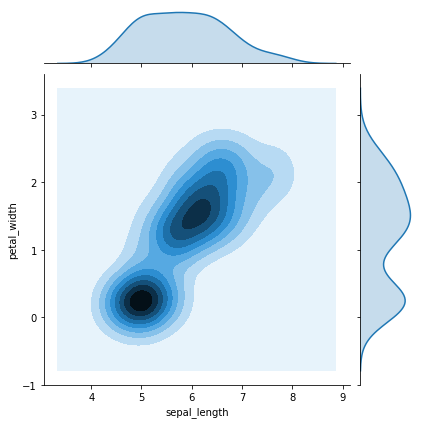

In [6]:
# Seaborn functions can be used with data in both 'wide form' (ie. array of data), or in 'Tidy form' where we specify
# variable names in a dataframe. 

# eg. Wide form
sns.jointplot(x=iris.sepal_length.values,y=iris.petal_width.values,kind='hex') 
plt.show()

# eg. Tidy form: note how variable names are automatically incorperated 
sns.jointplot(x='sepal_length',y='petal_width',data=iris,kind='kde') 
plt.show()

## Now we will move onto the Titanic dataset to see how Seaborn can allow us to quickly view how multiple factors effect a single variable

In [7]:
#  Now we will look at   data passangers aboard the titanic
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


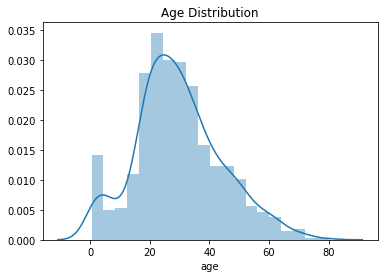

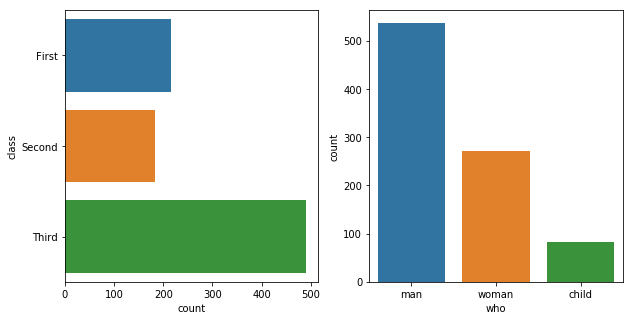

In [8]:
# First a couple of convinience functions 

# distplot overlays a kde plot with a histogram
sns.distplot(titanic.age.dropna())
plt.title('Age Distribution')
plt.show()

# count plot displays the counts of different classes of variables (like a histogram but for categorical data)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(y='class',data=titanic)
plt.subplot(1,2,2)
sns.countplot(x='who',data=titanic)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


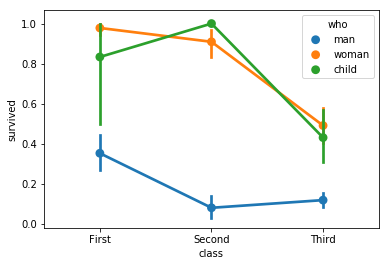

In [9]:
# Now, we may be interested in how sex and class affect survival rates. Using conventional plotting techniques,
# this might take many lines, in Seaborn it is easy
sns.pointplot(x='class',y='survived',hue='who',data=titanic)

# ... and in just a few seconds, we know that your age/sex are MUCH better predictors of if you are alive today than
# what class you were  in

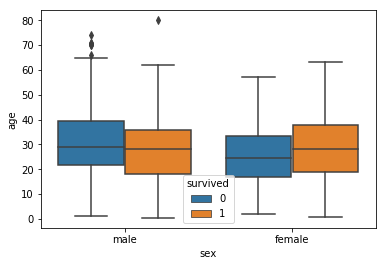

In [10]:
# the spread of numerical data can be quickly displayed with boxplot or its  similar functions
sns.boxplot(x='sex',y='age',data=titanic,hue='survived')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


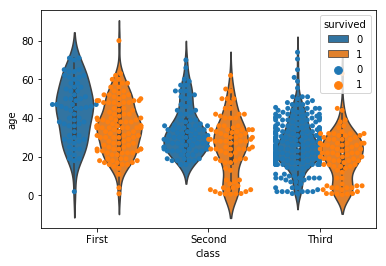

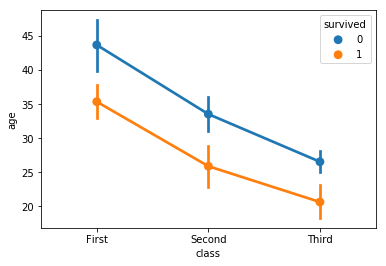

In [11]:
# plots can be overlaid to increase completeness
sns.violinplot(x='class',y='age',data=titanic,hue='survived')
sns.swarmplot(x='class',y='age',data=titanic,hue='survived',dodge=.3)
plt.show()
sns.pointplot(x='class',y='age',data=titanic,hue='survived')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


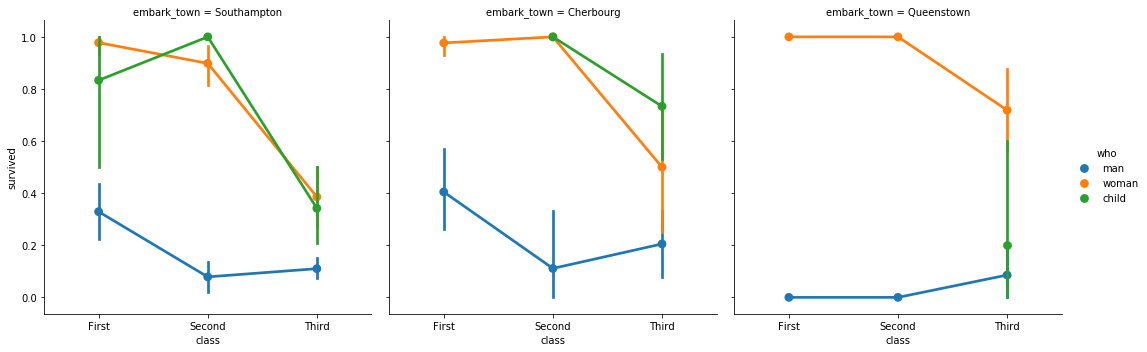

In [12]:
# finally, we can try and plot everything all at once
sns.catplot(x='class',y='survived',hue='who',col='embark_town',data=titanic,kind='point')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


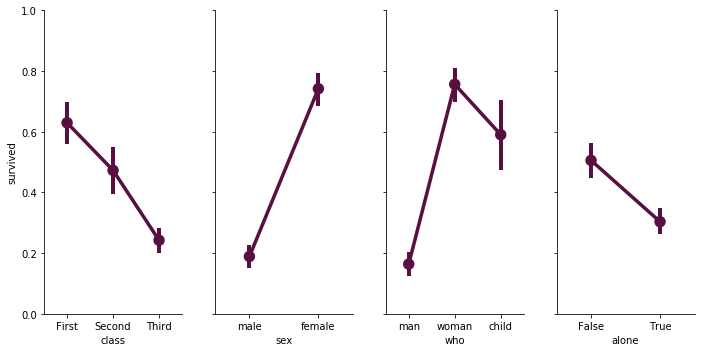

In [13]:
# More involved example from Seaborn Docs
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))